In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



In [2]:
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")


In [3]:
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
drug_data = pd.merge(mouse_data, clinical_data, on = "Mouse ID")
drug_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
drug_data_df_tr = drug_data.transpose()
drug_data_df_tr

,0,1,2,3,4,5,6,7,8,9,...,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905
Mouse ID,f234,f234,f234,f234,f234,f234,f234,f234,x402,x402,...,q787,q787,q787,q787,q787,j235,j235,j235,j235,j235
Drug,Stelasyn,Stelasyn,Stelasyn,Stelasyn,Stelasyn,Stelasyn,Stelasyn,Stelasyn,Stelasyn,Stelasyn,...,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo
Timepoint,0,5,10,15,20,25,30,35,0,5,...,25,30,35,40,45,0,5,10,15,20
Tumor Volume (mm3),45,47.3135,47.9043,48.7352,51.1127,52.1786,56.8738,57.7488,45,46.3276,...,52.7132,55.0362,60.3339,62.0341,66.0965,45,46.5888,48.0188,51.1611,52.9429
Metastatic Sites,0,0,0,1,2,2,2,2,0,1,...,2,2,3,3,3,0,0,1,1,1


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_aggs = drug_data.groupby(["Drug", "Timepoint"]).agg({'Tumor Volume (mm3)':"mean"})

# Convert to DataFrame
grouped_aggs_tr = grouped_aggs.reset_index()

grouped_aggs_tr


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_sem = drug_data.groupby(["Drug", "Timepoint"]).agg({'Tumor Volume (mm3)':"sem"})

# Convert to DataFrame
grouped_sem_tr = grouped_sem.reset_index()

grouped_sem_tr


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [9]:
tumor_mean=grouped_aggs_tr.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
tumor_sem=grouped_sem_tr.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
tumor_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


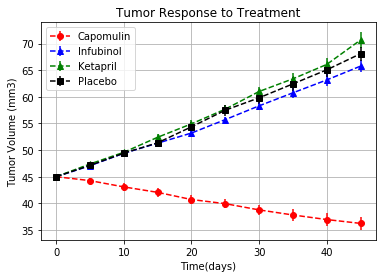

In [33]:
#timepoint= [0,5,10,15,20,25,30,35,40,45]

plt.errorbar(tumor_mean.index,tumor_mean["Capomulin"],yerr=tumor_sem["Capomulin"]
            ,label="Capomulin",marker= "o", color="red", linestyle='--')
plt.errorbar(tumor_mean.index,tumor_mean["Infubinol"],yerr=tumor_sem["Infubinol"]
            ,label="Infubinol",marker= "^", color="blue", linestyle='--')
plt.errorbar(tumor_mean.index,tumor_mean["Ketapril"],yerr=tumor_sem["Ketapril"]
            ,label="Ketapril",marker= "^", color="green", linestyle='--')
plt.errorbar(tumor_mean.index,tumor_mean["Placebo"],yerr=tumor_sem["Placebo"]
            ,label="Placebo",marker= "s", color="black", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.savefig("Fig1.png")
plt.show()
        
           

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_two_mean_aggs = drug_data.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"mean"})
grouped_two_mean_aggs_tr = grouped_two_mean_aggs.reset_index()
grouped_two_mean_aggs_tr

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [13]:
grouped_two_sem_aggs = drug_data.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites":"sem"})

grouped_two_sem_aggs_tr = grouped_two_sem_aggs.reset_index()

grouped_two_sem_aggs_tr

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [14]:
Matastatic_mean=grouped_two_mean_aggs_tr.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
Matastatic_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [15]:
Matastatic_sem=grouped_two_sem_aggs_tr.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
Matastatic_sem


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


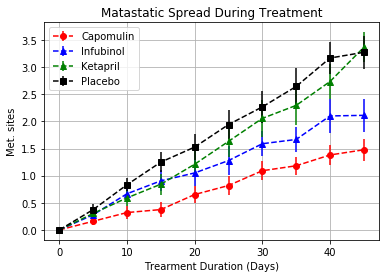

In [37]:
plt.errorbar(Matastatic_mean.index,Matastatic_mean["Capomulin"],yerr=Matastatic_sem["Capomulin"]
          ,label="Capomulin",marker= "o", color="red", linestyle='--')
plt.errorbar(Matastatic_mean.index,Matastatic_mean["Infubinol"],yerr=Matastatic_sem["Infubinol"]
           ,label="Infubinol",marker= "^", color="blue", linestyle='--')
plt.errorbar(Matastatic_mean.index,Matastatic_mean["Ketapril"],yerr=Matastatic_sem["Ketapril"]
           ,label="Ketapril",marker= "^", color="green", linestyle='--')
plt.errorbar(Matastatic_mean.index,Matastatic_mean["Placebo"],yerr=Matastatic_sem["Placebo"]
           ,label="Placebo",marker= "s", color="black", linestyle='--')
plt.legend()
plt.title("Matastatic Spread During Treatment")
plt.xlabel("Trearment Duration (Days)")
plt.ylabel("Met. sites")
plt.grid()
plt.savefig("Fig2.png")
plt.show()



## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mousecount_aggs = drug_data.groupby(["Drug", "Timepoint"]).agg({'Mouse ID':"count"})
mousecount_aggs_tr = mousecount_aggs.reset_index()
mousecount_aggs_tr


#Group_data = combined_data.groupby(["Drug", "Timepoint"])
#Count_Mice_Data = Group_data["Mouse ID"].count()

# Convert to DataFrame
#Mice_data = pd.DataFrame(Count_Mice_Data).reset_index()

# renaming the column name Mouse ID to Mouse Count 
#renamed_Mice_data = Mice_data.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
#renamed_Mice_data.head()


# Convert to DataFrame



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [18]:
# renaming the column name Mouse ID to Mouse Count 
renamed_mousecount_aggs_tr = mousecount_aggs_tr.rename(columns={"Mouse ID":"Mouse Count"})
renamed_mousecount_aggs_tr

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [19]:
renamed_mousecount_aggs_tr=renamed_mousecount_aggs_tr.pivot(index="Timepoint",columns="Drug",values="Mouse Count")
renamed_mousecount_aggs_tr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


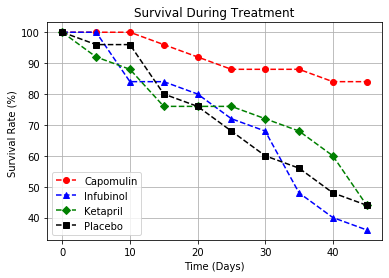

In [38]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
Timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(Timepoint, (renamed_mousecount_aggs_tr["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Timepoint, (renamed_mousecount_aggs_tr["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Timepoint, (renamed_mousecount_aggs_tr["Ketapril"]/25)*100 , label= "Ketapril", marker= "D", color="green", linestyle='--')
plt.plot(Timepoint, (renamed_mousecount_aggs_tr["Placebo"]/25)*100 , label= "Placebo", marker= "s", color="black", linestyle='--')
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()
plt.savefig("Fig3.png")
plt.show()

## Summary Bar Graph

In [39]:
tumor_mean_change=(tumor_mean.iloc[-1]-tumor_mean.iloc[0])/tumor_mean.iloc[0]*100
tumor_mean_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [30]:
bar_df=tumor_mean[["Capomulin","Infubinol","Placebo","Ketapril"]]
bar_df

Drug,Capomulin,Infubinol,Placebo,Ketapril
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.125589,47.389175
10,43.084291,49.403909,49.423329,49.582269
15,42.064317,51.296397,51.359742,52.399974
20,40.716325,53.197691,54.364417,54.920935
25,39.939528,55.715252,57.482574,57.678982
30,38.769339,58.299397,59.809063,60.994507
35,37.816839,60.742461,62.420615,63.371686
40,36.958001,63.162824,65.052675,66.068580


In [40]:
# Calculate the percent changes for each drug
tumor_mean_change=(bar_df.iloc[-1]-bar_df.iloc[0])/bar_df.iloc[0]*100
tumor_mean_change
# Display the data to confirm



Drug
Capomulin   -19.475303
Infubinol    46.123472
Placebo      51.297960
Ketapril     57.028795
dtype: float64

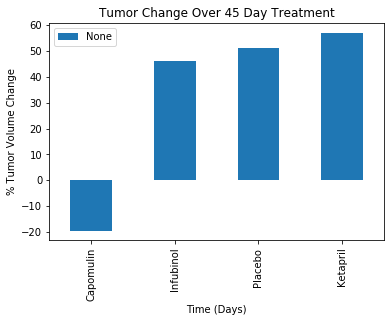

In [43]:
# Store all Relevant Percent Changes into a Tuple
my_drugs=(
    mean_change["Capomulin"],
    mean_change["Infubinol"],
    mean_change["Placebo"],
    mean_change["Ketapril"],   
)

my_bar_graph=mean_change.plot(kind="bar")

plt.legend()
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("% Tumor Volume Change")

fig=my_bar_graph.get_figure()
fig.savefig("Fig4.png")


# Splice the data between passing and failing drugs
#fig,ax=plt.subplots()
#drug_pass=ax.bar(my_drugs[0])
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
